In [1]:
import numpy as np
from sklearn.datasets import load_files
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the IMDB movie review dataset
reviews_dataset = pd.read_csv("movie_data.csv")

In [3]:
# Join all the reviews into a single string
all_reviews = ' '.join(reviews_dataset['review'])

# Tokenize the reviews into words
tokens = word_tokenize(all_reviews.lower())

# Remove stop words from the tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Compute the frequency distribution of the tokens
freq_dist = FreqDist(filtered_tokens)

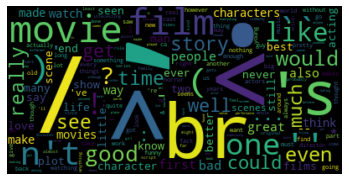

In [4]:
# Generate the word cloud from the frequency distribution
wordcloud = WordCloud().generate_from_frequencies(freq_dist)

# Display the word cloud using Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_dataset['review'], reviews_dataset['sentiment'], test_size=0.2)

In [7]:
# Vectorize the reviews using the CountVectorizer class
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [8]:
# Transform the counts into tf-idf features using the TfidfTransformer class
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [9]:
# Train a logistic regression classifier on the tf-idf features
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [10]:
# Predict the sentiment of the reviews in the testing set
y_pred = clf.predict(X_test_tfidf)

In [11]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', confusion_mat)

Accuracy: 0.8986391835101061
Confusion matrix: 
 [[4473  558]
 [ 455 4508]]
